<a href="https://colab.research.google.com/github/Constrictor369/Regression--Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### Team Member 1 - Siddhant Bagwe

# **Project Summary -**

Data Preprocessing :

Getting the dataset

Importing libraries

Importing datasets

Finding Missing Data

Encoding Categorical Data

Data Cleaning and Feature Engineering

EDA :

Checked the unique value counts of each column

Checked for missing values in the column and replaced them or removed them

Checked the best performing stores based on sales

Checked the best performing stores based on Customer footfall

Converted the data type of Date column

Created new columns from the Date column

Checked for the number of closed store observation and dropped them eventually

Checked for sales in each DayofWeek and concluded that Sundays have lowest sales and also that most often stores are closed on Sundays

Checked the distribution of each column and also looked for the presence of outliers and skewness in the features . Later did transformation and outlier removal for better performance of the models.

Supervised ML algorithms implemented :

1 ) Linear Regression

2 ) Lasso Regression

3 ) Ridge Regression

4 ) Decision Tree Regressor

The best performance was given by DT regressor though the tree was too deep and hence too complex and interpolation was also the issue . Hence the next best performing model , the ridge regression was choosen as the final model.

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates thousands of drug stores across Europe, and store managers are tasked with forecasting daily sales, a critical factor influenced by numerous variables, including promotions, competition, holidays, seasonality, and local factors. Inaccurate sales predictions leads to stockouts, overstocking, and increased holding costs. To address this issue, we aim to develop a robust machine learning model that leverages historical sales data and external factors to enhance sales forecasting accuracy and reduce inventory-related challenges.

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

The Retail Sales Prediction Project aims to develop a machine learning model to forecast sales for the retail company. The project leverages historical sales data and external factors to improve inventory management and optimize revenue. Expected outcomes include increased sales accuracy, reduced inventory costs, and improved customer satisfaction.

### **Define Your Business Objective?**

Improve sales forecasting accuracy .

Reduce overstock and stockout incidents .

Optimize inventory costs, resulting in reduction in holding costs.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PowerTransformer
from sklearn.linear_model import LinearRegression,Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rossmann_df = pd.read_csv('/content/Rossmann Stores Data.csv')
stores_df=pd.read_csv('/content/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
stores_df


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(stores_df.shape)
print(rossmann_df.shape)

(1115, 10)
(1017209, 9)


### Dataset Information

In [ ]:
# Dataset Info
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


 5 columns have high number of null values and CompetitionDistance column has 3 null values

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


no missing values in this df

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
stores_df.duplicated().sum()

0

In [ ]:
rossmann_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

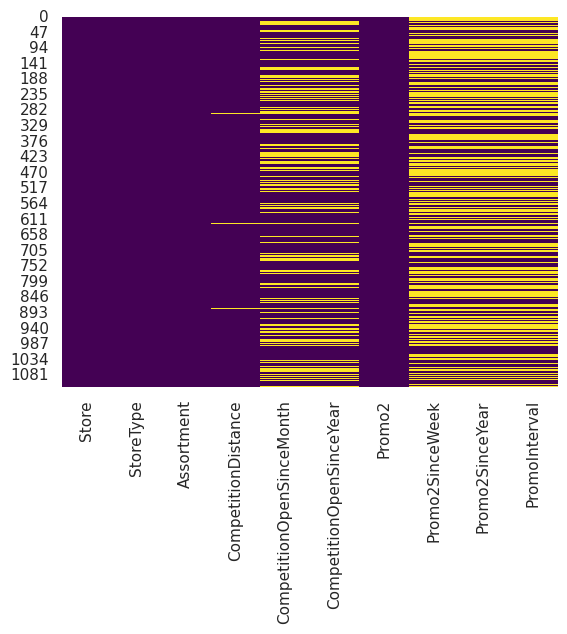

In [ ]:
# Visualizing the missing values
sns.heatmap(stores_df.isnull(),cbar = False,cmap = 'viridis')

# yellow lines represents missing values

### What did you know about your dataset?
We have two datasets namely stores_df and rossmann_df .

stores_df has 1115 rows containing information about different Rossmann Stores and there are 10 columns

rossmann_df is a bigger dataset which provides various features about the stores along with sales from the stores , the transaction date and multiple other information.It contains information about each sales transaction of each store and also provide other information like how many customers visited the store that day

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
stores_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
stores_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
rossmann_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

Answer Here


Dataset Description

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

Data fields

The following are descriptions for the features of the datasets ::--

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates school holiday (1) or not (0)

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



### Check Unique Values for each variable.

In [ ]:
stores_df = stores_df[['Store','StoreType' , 'Assortment' , 'CompetitionDistance','Promo2']]

In [ ]:
# creating a new dataset by merging the two datasets

new_df = rossmann_df.merge(stores_df, how = 'left' , on = 'Store')

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [ ]:


new_df.shape

(1017209, 13)

In [ ]:
# Check Unique Values for each variable.
for i in new_df.columns:
  print(i)
  print(new_df[i].value_counts())

Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
Date
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64
Customers
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64
Open
1    84439

In [ ]:
new_df.isnull().sum()   #Checking for null values

Store                     0
DayOfWeek                 0
Date                      0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2642
Promo2                    0
dtype: int64

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# The stores performance in terms of sales
new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False)
# max total sales of a store is around 19.5 million.
# Least total sales of a Store is 2.1 million.

Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
          ...   
263      2306075
208      2302052
198      2268273
543      2179287
307      2114322
Name: Sales, Length: 1115, dtype: int64

In [ ]:
# Stores based on customer footfall overall.

new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False)

# best customer influx is seen in store no 733 and 262 with total number of customer visiting is around 3.2 million.
# store no 543 is least performer based on customer visits with tot. no. of customer visiting around 187k

Store
733     3206058
262     3204694
562     2924960
769     2902351
1114    2509542
         ...   
702      215970
573      208622
254      201507
407      195715
543      187583
Name: Customers, Length: 1115, dtype: int64

In [ ]:
# DayofWeek value counts
new_df['DayOfWeek'].value_counts()

# The dataset contains almost equal entries for each DayofWeek

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [ ]:
# object datatype column.
new_df.Date.dtype

dtype('O')

In [ ]:
# changing the dtype of date column

new_df['Date'] = pd.to_datetime(new_df['Date'])

In [ ]:
# creating new columns from date column -- year , month , day

new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day'] = new_df['Date'].dt.day

In [ ]:
# dropping the date column

new_df.drop('Date',axis = 1,inplace = True)

In [ ]:
new_df['Open'].value_counts()

# The number of store closed observations is 1/5th of store open observations.

1    844392
0    172817
Name: Open, dtype: int64

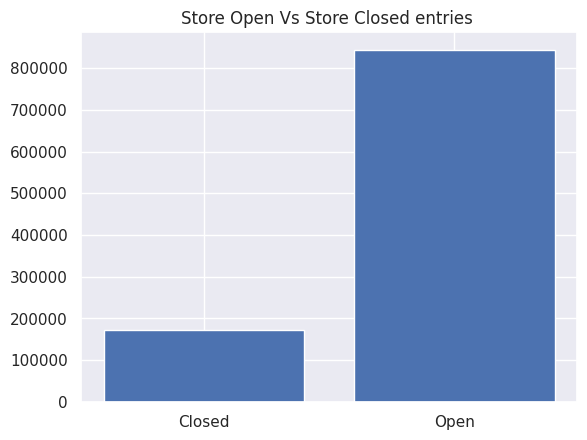

In [ ]:
# Store Open Vs Store Closed entries

plt.bar(new_df['Open'].value_counts().index , new_df['Open'].value_counts().values)
plt.title('Store Open Vs Store Closed entries ')
plt.xticks(new_df['Open'].value_counts().index, ['Open', 'Closed'])
plt.show()

In [ ]:
new_df[new_df['Open']==0]
# No sales in all these observations .

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day
291,292,5,0,0,0,1,0,1,a,a,1100.0,0,2015,7,31
875,876,5,0,0,0,1,0,1,a,a,21790.0,1,2015,7,31
1406,292,4,0,0,0,1,0,1,a,a,1100.0,0,2015,7,30
1990,876,4,0,0,0,1,0,1,a,a,21790.0,1,2015,7,30
2521,292,3,0,0,0,1,0,1,a,a,1100.0,0,2015,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,1900.0,1,2013,1,1
1017205,1112,2,0,0,0,0,a,1,c,c,1880.0,0,2013,1,1
1017206,1113,2,0,0,0,0,a,1,a,c,9260.0,0,2013,1,1
1017207,1114,2,0,0,0,0,a,1,a,c,870.0,0,2013,1,1


In [ ]:
new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index()
# 7 represent sunday , it is when most often stores are closed
# followed by thursday,friday.
# least store closure is seen in saturdays.

1      7170
2      1703
3      3729
4     11201
5      7205
6       672
7    141137
Name: DayOfWeek, dtype: int64

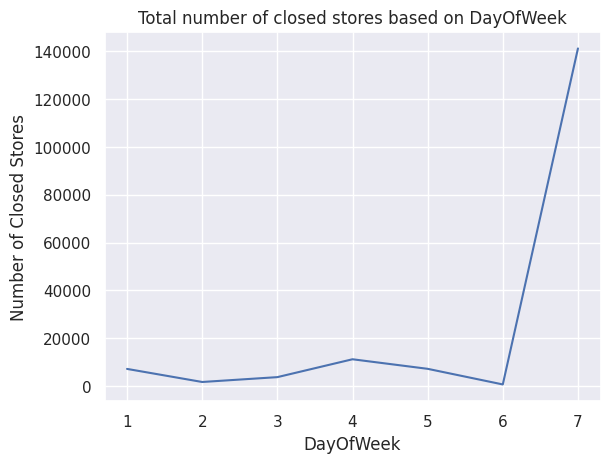

In [ ]:
# Total number of closed stores based on DayOfWeek
plt.plot(new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().index , new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().values)
plt.title('Total number of closed stores based on DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Closed Stores')
plt.show()

In [ ]:
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]
# Observations providing info about stores ,and their sales, who were open on sundays .

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day
5659,85,7,11421,1606,1,0,0,0,b,a,1870.0,0,2015,7,26
5696,122,7,5773,707,1,0,0,0,a,c,58260.0,0,2015,7,26
5783,209,7,3742,354,1,0,0,0,a,c,11680.0,1,2015,7,26
5833,259,7,15998,2857,1,0,0,0,b,b,210.0,0,2015,7,26
5836,262,7,32547,4783,1,0,0,0,b,a,1180.0,0,2015,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011252,733,7,11226,2584,1,0,0,0,b,b,860.0,0,2013,1,6
1011288,769,7,6995,1764,1,0,0,0,b,b,840.0,1,2013,1,6
1011382,863,7,2067,255,1,0,0,0,a,c,21370.0,0,2013,1,6
1011467,948,7,6024,1402,1,0,a,0,b,b,1430.0,0,2013,1,6


In [ ]:
# Stores based on their sale performance on sundays .
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False)

Store
262     3812344
562     2543021
733     2029261
259     1954730
423     1807627
1097    1579436
85      1518961
676     1428960
769     1385776
948     1223835
494     1053291
335     1050436
682      974170
353      972216
274      854088
512      670396
578      515297
1081     514451
530      430381
1099     429940
453      378876
1045     313783
299      304991
122      265218
732      262286
310      238772
863      200546
209      176327
524      173632
867      154826
931      154064
433      105258
877       74237
Name: Sales, dtype: int64

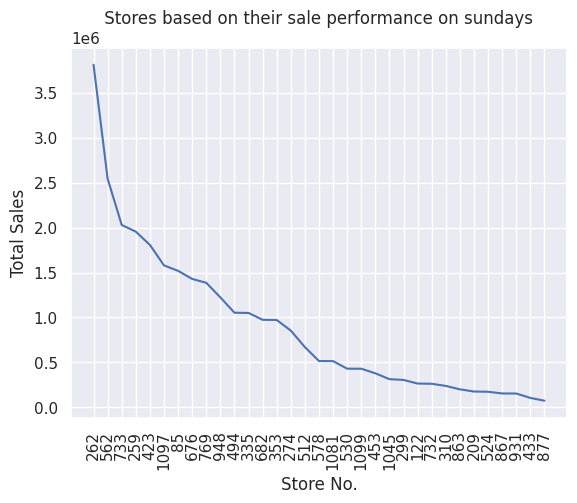

In [ ]:
plt.plot(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.title(' Stores based on their sale performance on sundays ')
plt.xlabel('Store No.')
plt.ylabel('Total Sales')
plt.xticks(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,rotation = 'vertical')
plt.show()

In [ ]:
# ids and total number of the few stores that are open on sundays
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].unique(),'\n')
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].nunique())

[  85  122  209  259  262  274  299  310  335  353  423  433  453  494
  512  524  530  562  578  676  682  732  733  769  863  867  931  948
 1045 1081 1097 1099  877] 

33


In [ ]:
# Number of Open stores in each year
new_df.groupby('year')['Open'].sum()

# max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

year
2013    337943
2014    310417
2015    196032
Name: Open, dtype: int64

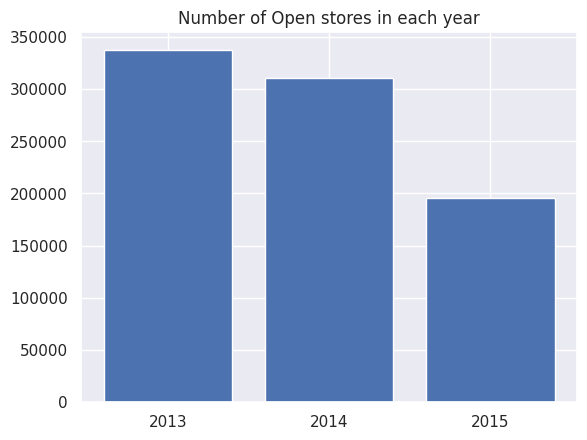

In [ ]:
plt.bar(new_df.groupby('year')['Open'].sum().index , new_df.groupby('year')['Open'].sum().values)
plt.title('Number of Open stores in each year')
plt.xticks(new_df.groupby('year')['Open'].sum().index)
plt.show()

In [ ]:
new_df['Promo'].value_counts()


0    629129
1    388080
Name: Promo, dtype: int64

In [ ]:
new_df.groupby(['StoreType'])['Promo'].sum()
# Most promo were done by storeType a .

StoreType
a    210504
b      6046
c     52244
d    119286
Name: Promo, dtype: int64

<BarContainer object of 4 artists>

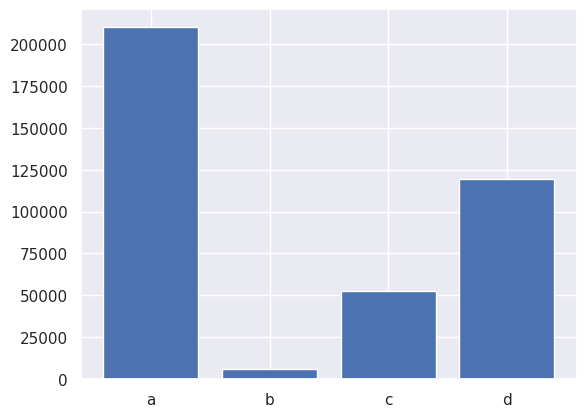

In [ ]:
plt.bar(new_df.groupby(['StoreType'])['Promo'].sum().index , new_df.groupby(['StoreType'])['Promo'].sum().values)

In [ ]:
new_df.groupby(['Assortment'])['Promo'].sum()

# Most Promo were done by Stores with Assortment a

Assortment
a    204970
b      3166
c    179944
Name: Promo, dtype: int64

<BarContainer object of 3 artists>

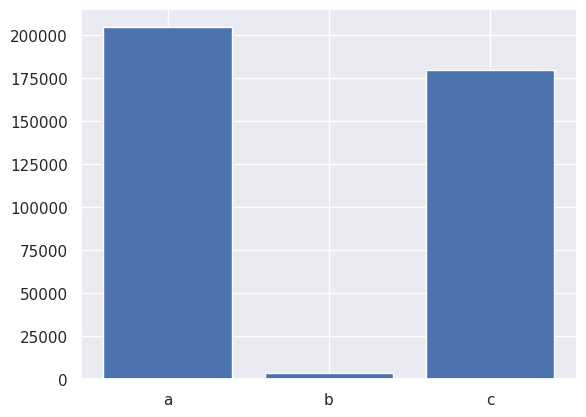

In [ ]:
plt.bar(new_df.groupby(['Assortment'])['Promo'].sum().index , new_df.groupby(['Assortment'])['Promo'].sum().values)

In [ ]:
new_df.groupby(['SchoolHoliday'])['Open'].sum()

# very few stores are open on school holidays.

SchoolHoliday
0    680935
1    163457
Name: Open, dtype: int64

Text(0.5, 0, 'school holiday')

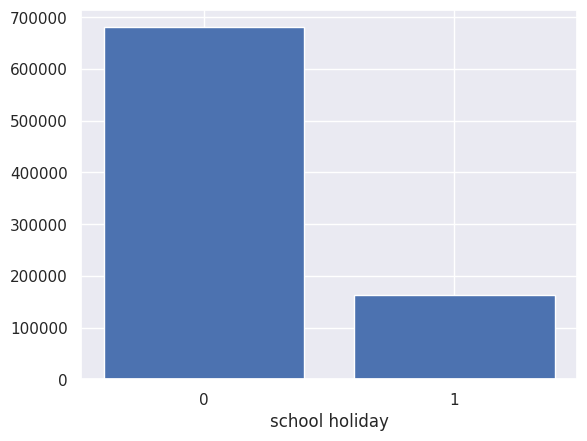

In [ ]:
plt.bar(['0','1'] , new_df.groupby(['SchoolHoliday'])['Open'].sum().values)
plt.xlabel('school holiday')

In [ ]:
new_df['StateHoliday'].value_counts()

# Two different categories of 0 present .

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# since a,b,c represent holiday ,we will replace them by 1 and others with 0

new_df['StateHoliday'] = np.where((new_df['StateHoliday'] == 0) | (new_df['StateHoliday'] == '0'),0 ,1)

In [ ]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31


In [ ]:
new_df.groupby(['StateHoliday'])['Open'].sum()

# Very few stores are open on holidays

StateHoliday
0    843482
1       910
Name: Open, dtype: int64

<BarContainer object of 2 artists>

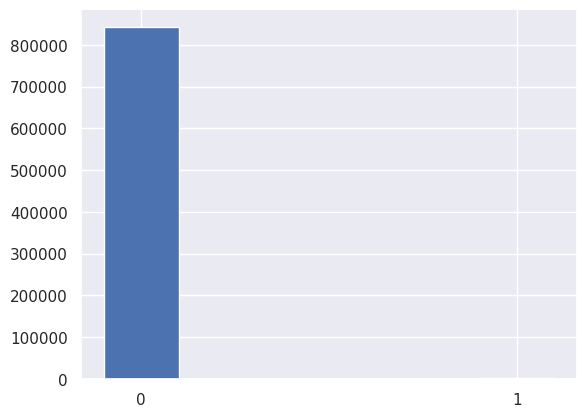

In [ ]:
plt.bar(['0','1'],new_df.groupby(['StateHoliday'])['Open'].sum().values , width = 0.2)

In [ ]:
new_df.groupby('Store')['Open'].sum()

Store
1       781
2       784
3       779
4       784
5       779
       ... 
1111    779
1112    779
1113    784
1114    784
1115    781
Name: Open, Length: 1115, dtype: int64

In [ ]:
new_df.groupby('year')['Sales'].sum()

year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

Text(0.5, 1.0, 'Sales each year')

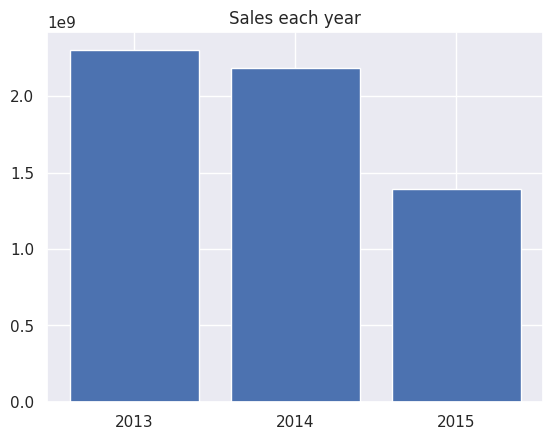

In [ ]:
plt.bar(new_df.groupby('year')['Sales'].sum().index , new_df.groupby('year')['Sales'].sum().values)
plt.xticks(new_df.groupby('year')['Sales'].sum().index)
plt.title('Sales each year')

In [ ]:
new_df.groupby('month')['Sales'].sum()

# Total Sales for each month.March tops the list, followed by July.

month
1     566728724
2     528734410
3     599831906
4     575895295
5     569248217
6     578112775
7     595059205
8     361791202
9     342570131
10    351878728
11    369498877
12    433831153
Name: Sales, dtype: int64

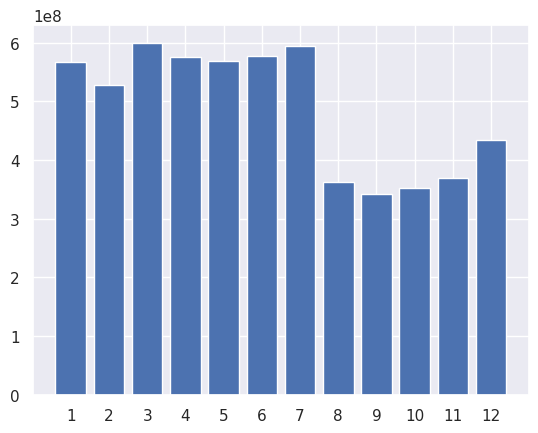

In [ ]:
plt.bar(new_df.groupby('month')['Sales'].sum().index , new_df.groupby('month')['Sales'].sum().values)
plt.xticks(new_df.groupby('month')['Sales'].sum().index)
plt.show()

In [ ]:
new_df.groupby('DayOfWeek')['Sales'].sum()

# total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

<BarContainer object of 7 artists>

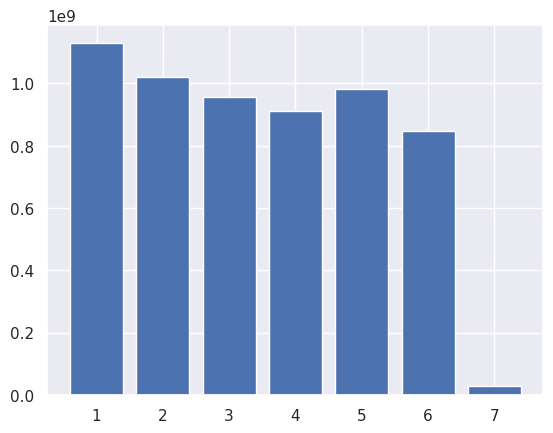

In [ ]:
plt.bar(new_df.groupby('DayOfWeek')['Sales'].sum().index , new_df.groupby('DayOfWeek')['Sales'].sum().values)

In [ ]:
new_df.groupby('day')['Sales'].sum()

day
1     155983560
2     233513169
3     194582812
4     228301010
5     212869176
6     197094539
7     201380487
8     189718770
9     175922427
10    181039363
11    183373089
12    174242021
13    192254717
14    180183130
15    195262955
16    213593069
17    205070891
18    213308167
19    195100959
20    195546908
21    182630806
22    183172786
23    190009101
24    166601783
25    161519579
26    161973928
27    194264879
28    196952797
29    177114239
30    219939617
31    120659889
Name: Sales, dtype: int64

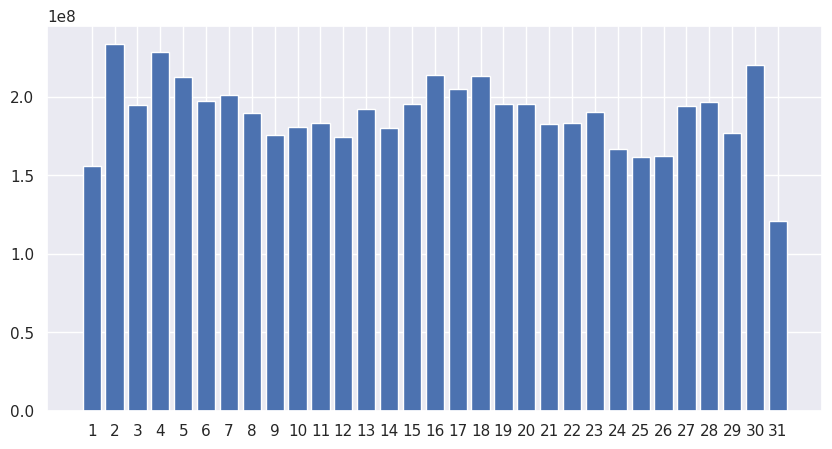

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(new_df.groupby('day')['Sales'].sum().index ,new_df.groupby('day')['Sales'].sum().values )
plt.xticks(new_df.groupby('day')['Sales'].sum().index)
plt.show()

In [ ]:
# Observations where store is open but sales is 0 .

new_df.loc[(new_df['Sales'] == 0) & new_df['Open'] == 1]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day
86825,971,5,0,0,1,0,0,1,c,a,1140.0,1,2015,5,15
142278,674,4,0,0,1,0,0,0,a,a,2640.0,1,2015,3,26
196938,699,4,0,0,1,1,0,0,a,a,180.0,1,2015,2,5
322053,708,3,0,0,1,1,0,0,c,c,11470.0,1,2014,10,1
330176,357,1,0,0,1,0,0,0,a,a,2060.0,0,2014,9,22
340348,227,4,0,0,1,0,0,0,a,a,2370.0,0,2014,9,11
340860,835,4,0,0,1,0,0,0,a,a,2890.0,1,2014,9,11
341795,835,3,0,0,1,0,0,0,a,a,2890.0,1,2014,9,10
346232,548,5,0,0,1,1,0,1,d,c,3760.0,0,2014,9,5
346734,28,4,0,0,1,1,0,0,a,a,1200.0,1,2014,9,4


In [ ]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
new_df.isnull().sum()

Store                     0
DayOfWeek                 0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2642
Promo2                    0
year                      0
month                     0
day                       0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  int64  
 7   SchoolHoliday        1017209 non-null  int64  
 8   StoreType            1017209 non-null  object 
 9   Assortment           1017209 non-null  object 
 10  CompetitionDistance  1014567 non-null  float64
 11  Promo2               1017209 non-null  int64  
 12  year                 1017209 non-null  int64  
 13  month                1017209 non-null  int64  
 14  day                  1017209 non-null  int64  
dty

In [ ]:
# Dropping the observations where stores are closed , Since for those observation , the associated sales is always 0.

new_df = new_df.loc[~(new_df['Open'] == 0)]

In [ ]:
new_df.shape

(844392, 15)

In [ ]:
# replacing the null values in CompetitionDistance with 0 . It is because they corresponds to the stores having no competition store available.

new_df.loc[new_df['CompetitionDistance'].isnull() , ['CompetitionDistance']] = 0

In [ ]:
new_df[new_df['CompetitionDistance'].isnull()]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day


In [ ]:
# the number of observations with sales = 0
len(new_df[new_df['Sales']==0])

54

### What all manipulations have you done and insights you found?

Answer Here.

Manipulations Done --

1 - changing the dtype of date column

2 - creating new columns from date column -- year , month , day

3 - dropping the date column

4 - StateHoliday column contains two unique 0 values referring to No state Holiday . Replacing both 0 categories with 0 to give proper representation .

5 - Dropping the observations where stores are closed

6 -replacing the null values in CompetitionDistance with 0 . It is because they corresponds to the stores having no competition store available.

Insights Found::--

max total sales of a store is around 19.5 million. Least total sales of a Store is 2.1 million. The number of store closed observations is 1/5th of store open observations.

most often stores are closed on sundays followed by thursday,friday. least store closure is seen in saturdays.

there are only few stores who are open on sundays .

max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

Most stores are open when there are no holidays .

Total Sales for each month.March tops the list, followed by July.

total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

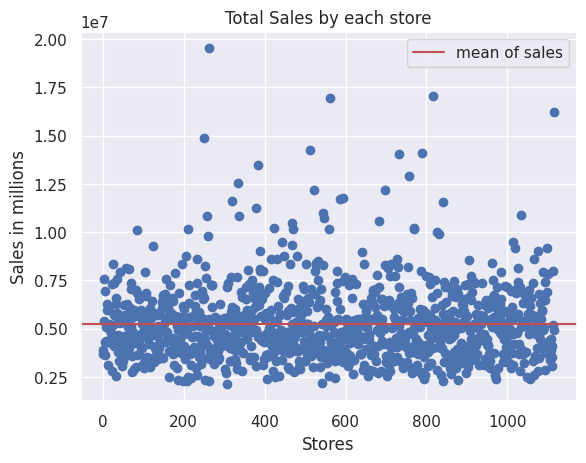

In [ ]:
# Chart - 1 visualization code
plt.scatter(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values),color = 'r',label = 'mean of sales')
plt.title('Total Sales by each store')
plt.xlabel('Stores')
plt.ylabel('Sales in millions')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

The chart shows the mean of overall sales . The shows the number of outperforming stores.The chart shows the overall distribution of sales for all stores.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The mean value of sales is around 500,000 .

Majority of stores of total sales in the range of 250,000 to 750,000

We have few outperforming store who have total sales greater than even 1 million .

The max value of total sales of a store is around 2 million.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

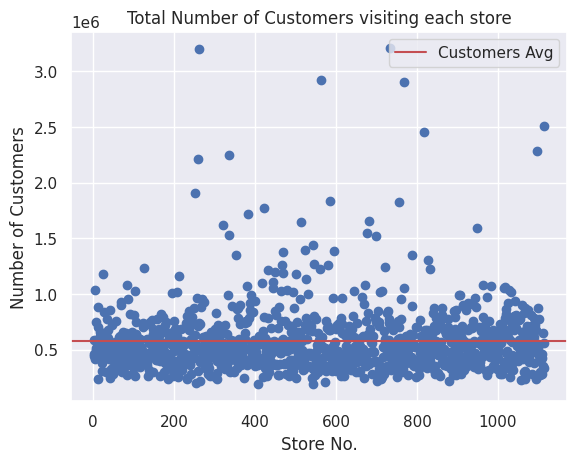

In [ ]:
# Chart - 2 visualization code
plt.scatter(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).index , new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending = False).values),color = 'r',label = 'Customers Avg')
plt.title('Total Number of Customers visiting each store')
plt.xlabel('Store No.')
plt.ylabel('Number of Customers')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here

The chart shows the mean of overall customers . The shows the number of outperforming customers.The chart shows the overall distribution of customers for all stores.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

the mean number of customers visiting each store is around 60,000

the best performing stores have the customers visiting around 3.5 lakhs.However the most stores are having customer visits in range of 25000 to 75000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the infprmation derived from the chars shows the stores with less footfall of customers .These stores could be given special attension in terms of sales will boost the overall growth

#### Chart - 3

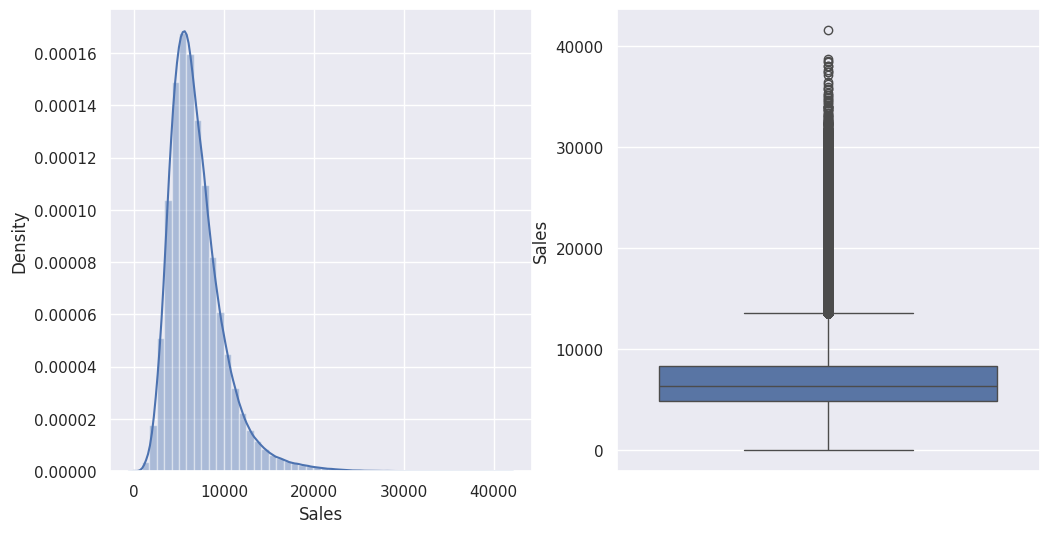

In [ ]:
# Chart - 3 visualization code

# analysis of dependent variable -- Sales

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(new_df['Sales'])
plt.subplot(1,2,2)
sns.boxplot(new_df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Distribution plot provides the distribution of the data . we get to know about the skewness of the data . While the box plot visualizes the median ,iqr and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Sales column is Right skewed with it peak at around 5000 - 6000 range.

There are high number of outliers in sales showing very high sales value . This means that some stores are exceptionally profitable.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# univariate analysis.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Sales                844392 non-null  int64  
 3   Customers            844392 non-null  int64  
 4   Open                 844392 non-null  int64  
 5   Promo                844392 non-null  int64  
 6   StateHoliday         844392 non-null  int64  
 7   SchoolHoliday        844392 non-null  int64  
 8   StoreType            844392 non-null  object 
 9   Assortment           844392 non-null  object 
 10  CompetitionDistance  844392 non-null  float64
 11  Promo2               844392 non-null  int64  
 12  year                 844392 non-null  int64  
 13  month                844392 non-null  int64  
 14  day                  844392 non-null  int64  
dtypes: float64(1), i

In [ ]:
numerical_col = []
categorical_col = []
for col in new_df.columns:
  if (new_df[col].dtype == int) | (new_df[col].dtype == float):
    numerical_col.append(col)
  else:
    categorical_col.append(col)

In [ ]:
numerical_col

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'year',
 'month',
 'day']

In [ ]:
categorical_col

['StoreType', 'Assortment']

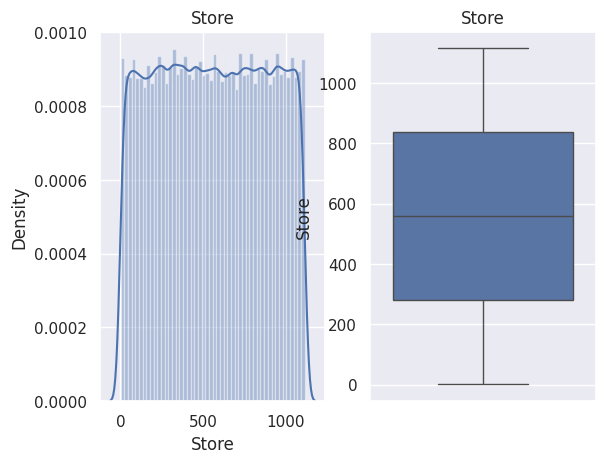

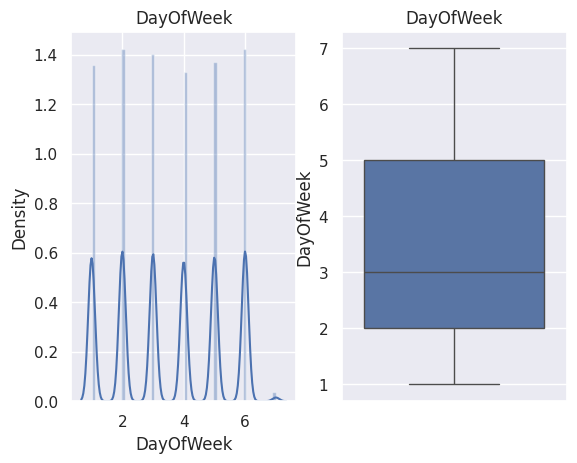

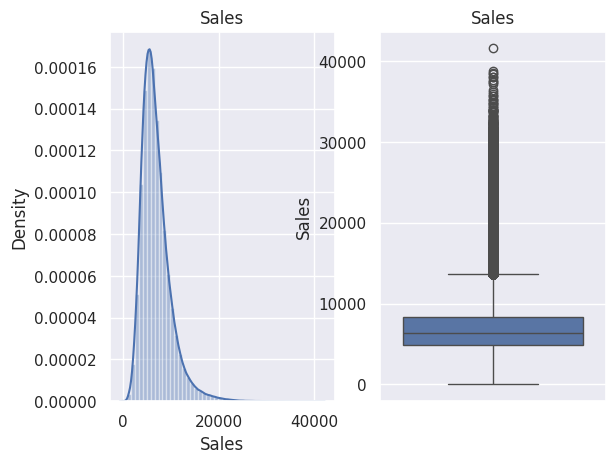

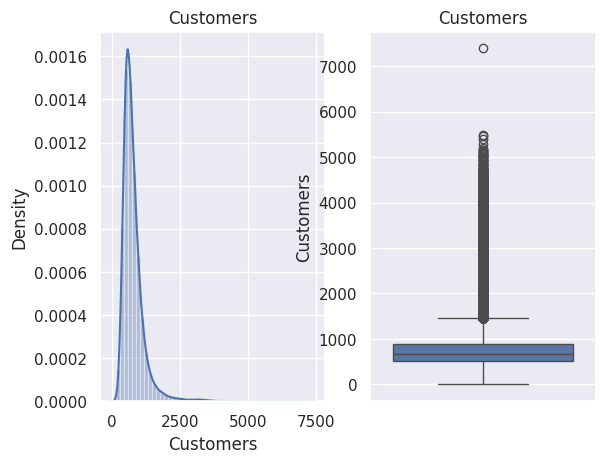

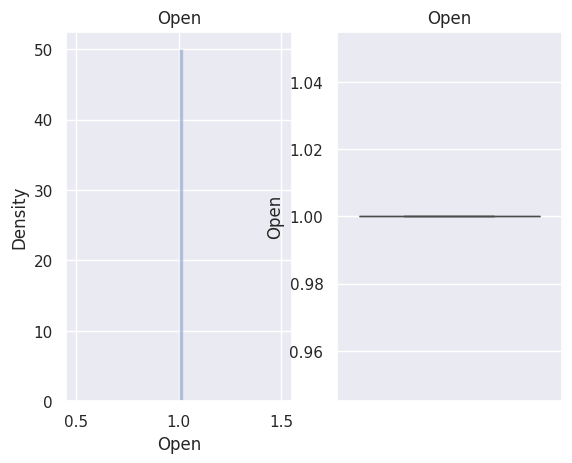

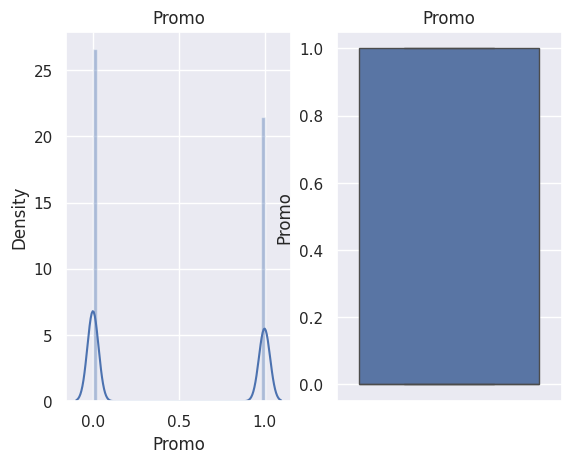

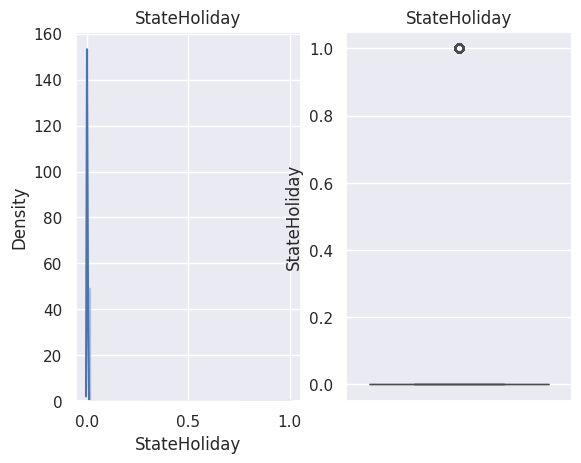

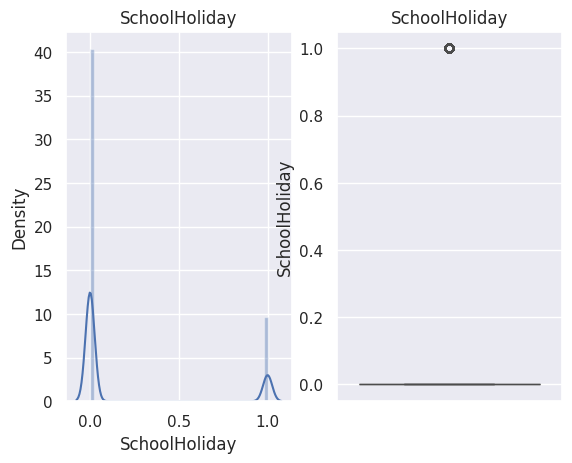

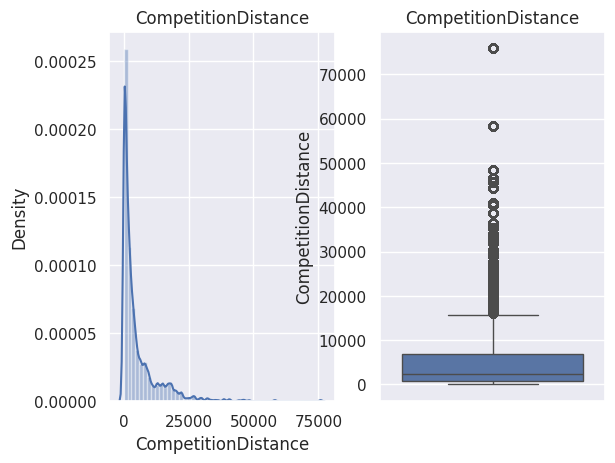

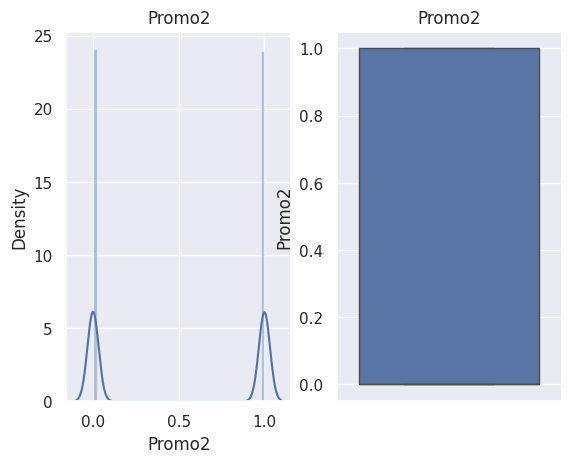

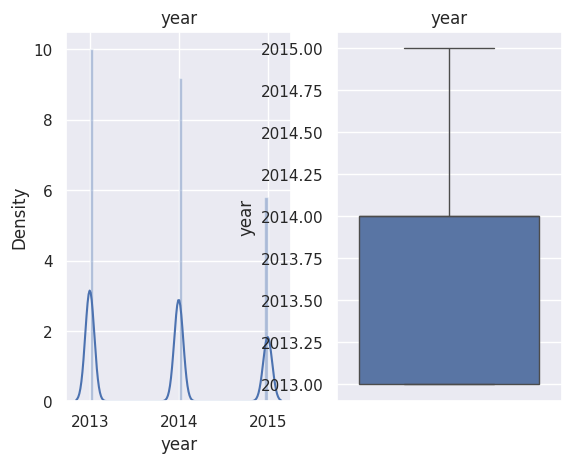

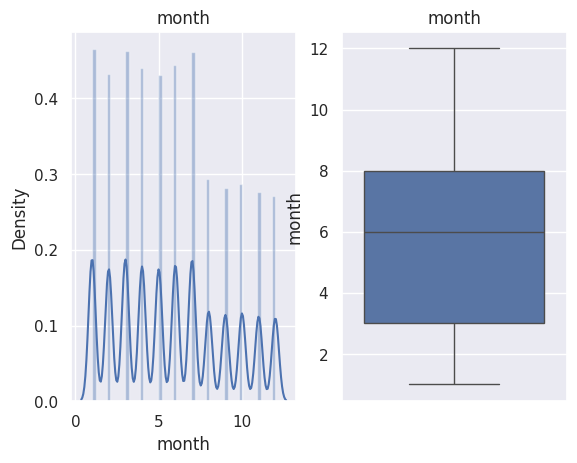

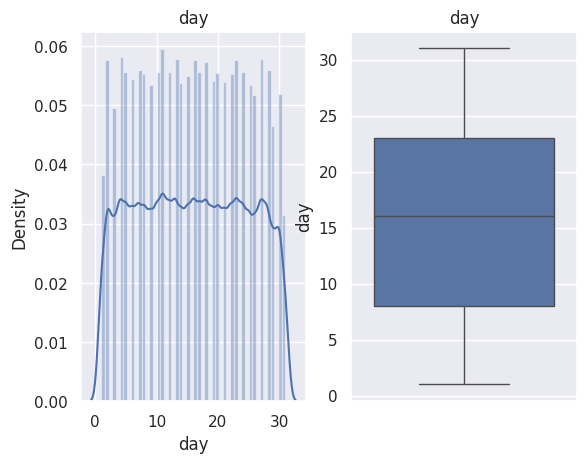

In [ ]:
for col in numerical_col:
  plt.subplot(1,2,1)
  sns.distplot(new_df[col])
  plt.title(col)
  plt.subplot(1,2,2)
  sns.boxplot(new_df[col])
  plt.title(col)
  plt.show()

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Answer Here.

DayOfWeek column had almost equal number of each day . obviously has no outliers as well.

Customers column has peak around 1000 . it is positively skewed and has a significant number of outliers .

Open has two unique values 0 and 1 and majority of values are 1 indicating open store

Promo also has 2 values . majorly 1 but 0 here also significantly high.

StateHoliday has 2 values . majorly 0 and 1 in very low number .indicating very few observations with stateholiday.

School holiday also majorly has 0 values indicating working day for school.

Competition distance has peak around 3000 with significant number of outliers.

Month column shows that first 7 months have more sales .

presence of outliers in Sales , Customers , CompetitionDistance

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# outlier removal of sales using zscore
mean = new_df['Sales'].mean()
std = new_df['Sales'].std()

new_df = new_df[(new_df['Sales'] > mean-3*std) & (new_df['Sales'] < mean + 3*std)]

In [ ]:
new_df.shape

(830955, 15)

In [ ]:
# outlier removal of customers using zscore
mean = new_df['Customers'].mean()
std = new_df['Customers'].std()

new_df = new_df[(new_df['Customers'] > mean-3*std) & (new_df['Customers'] < mean + 3*std)]

In [ ]:
new_df.shape

(818552, 15)

In [ ]:
# Outlier removal of CompetitionDistance using zscore

mean = new_df['CompetitionDistance'].mean()
std = new_df['CompetitionDistance'].std()

new_df = new_df[(new_df['CompetitionDistance'] > mean-3*std) & (new_df['CompetitionDistance'] < mean + 3*std)]

In [ ]:
new_df.shape

(801656, 15)

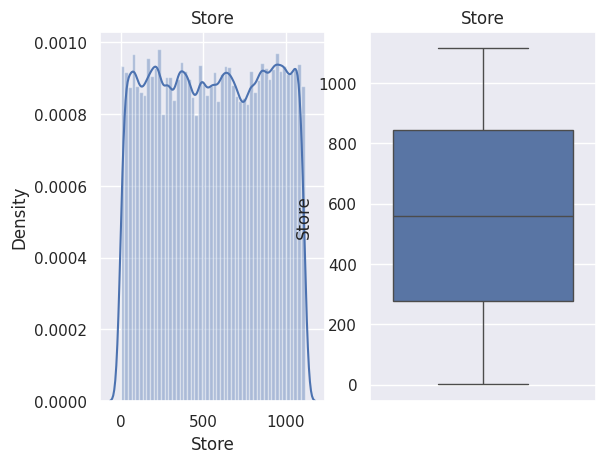

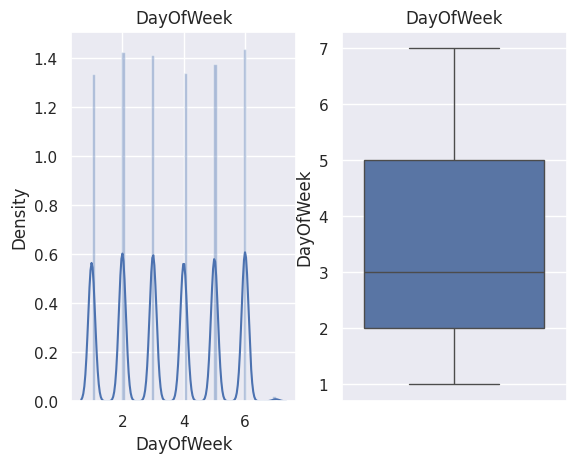

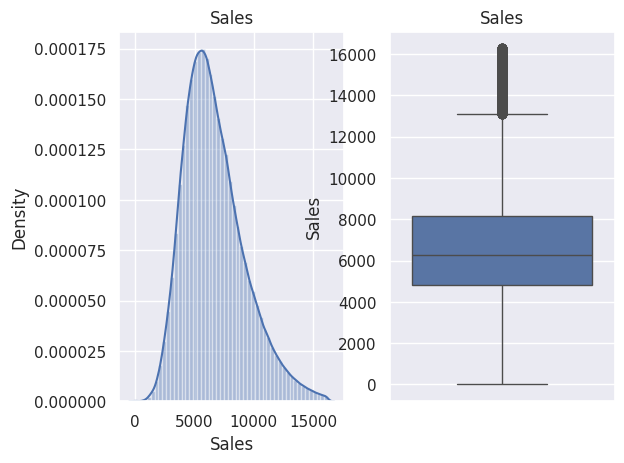

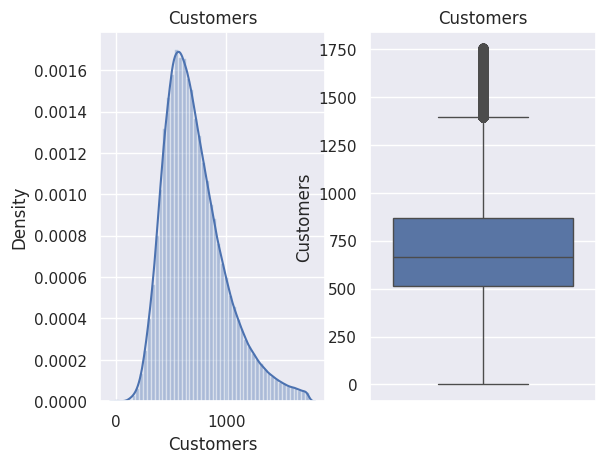

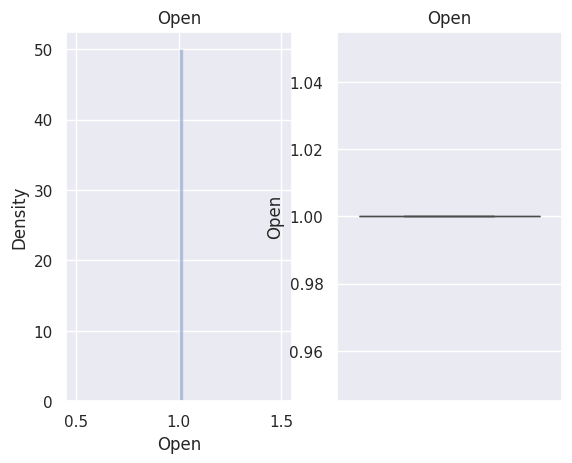

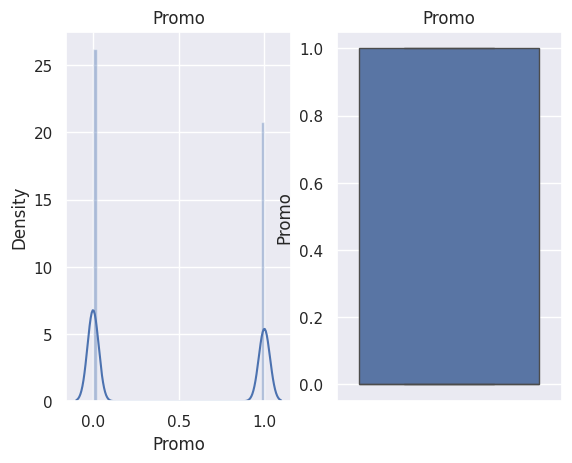

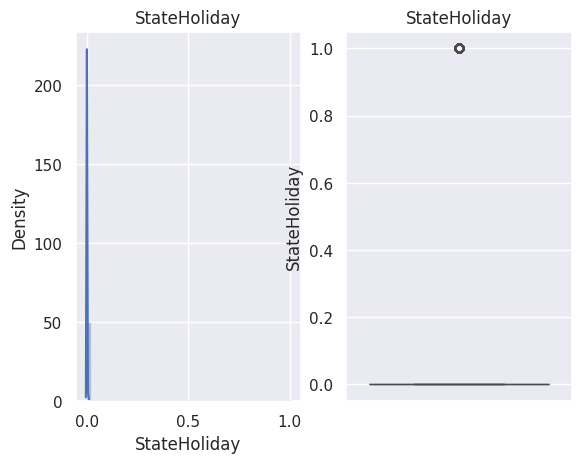

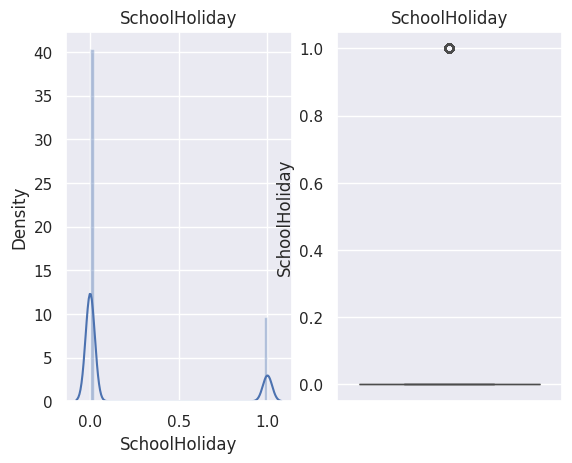

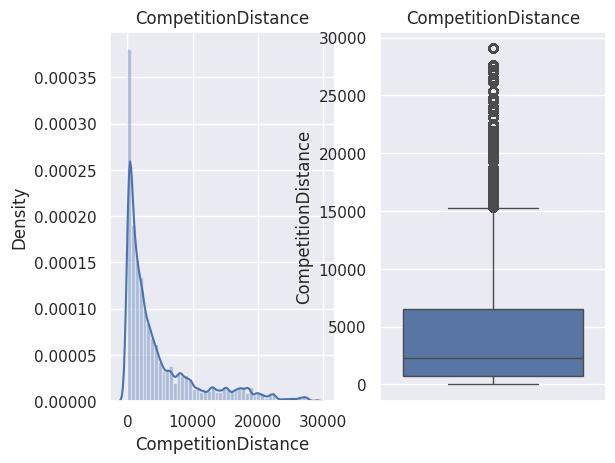

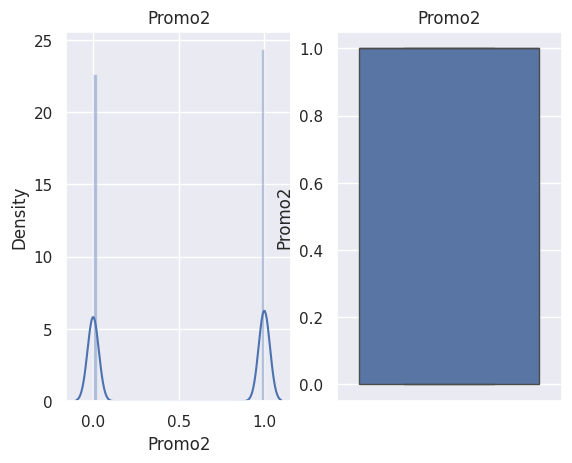

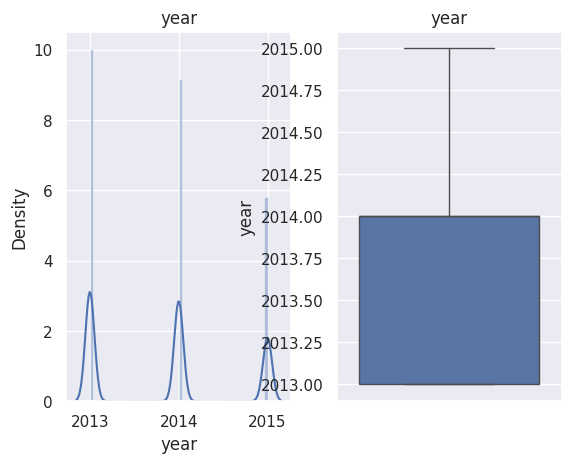

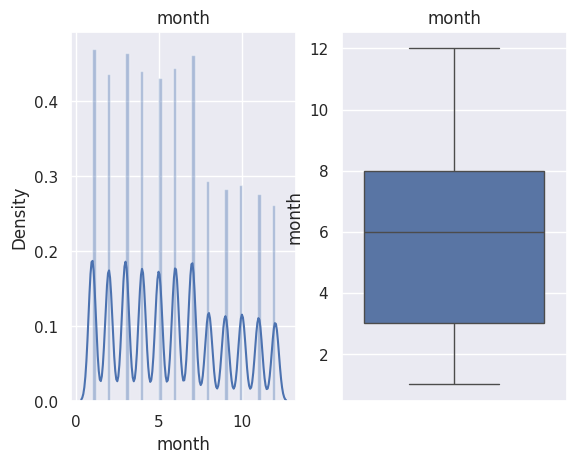

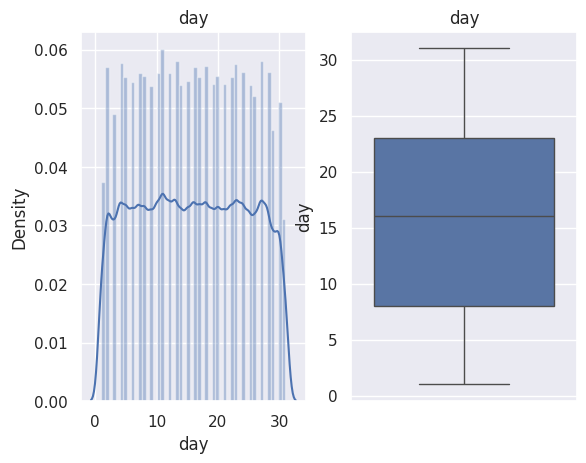

In [ ]:
# Again checking the distribution

for col in numerical_col:
  plt.subplot(1,2,1)
  sns.distplot(new_df[col])
  plt.title(col)
  plt.subplot(1,2,2)
  sns.boxplot(new_df[col])
  plt.title(col)
  plt.show()

#### Chart - 6

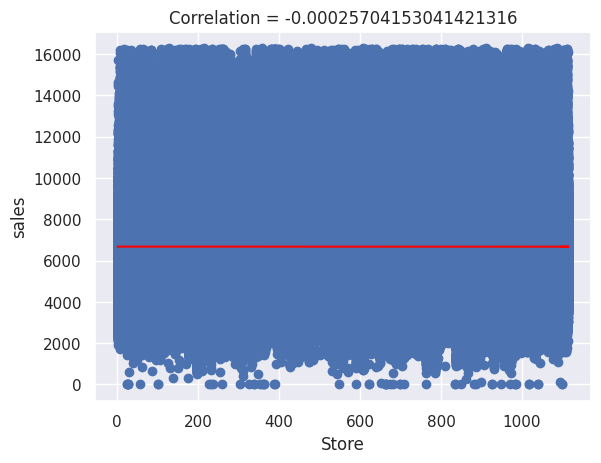

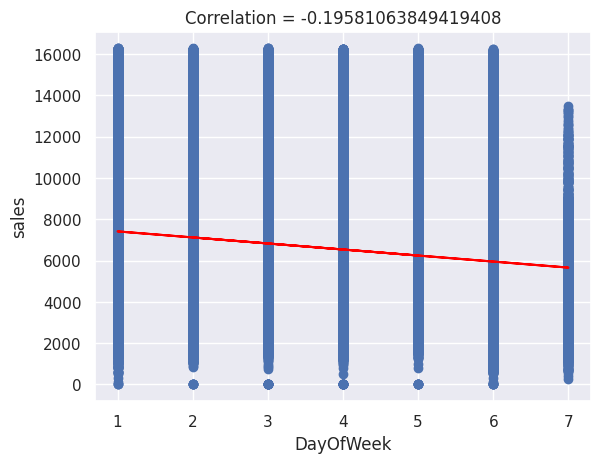

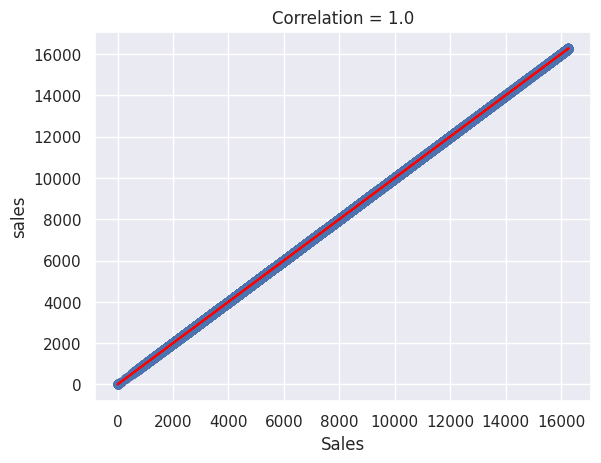

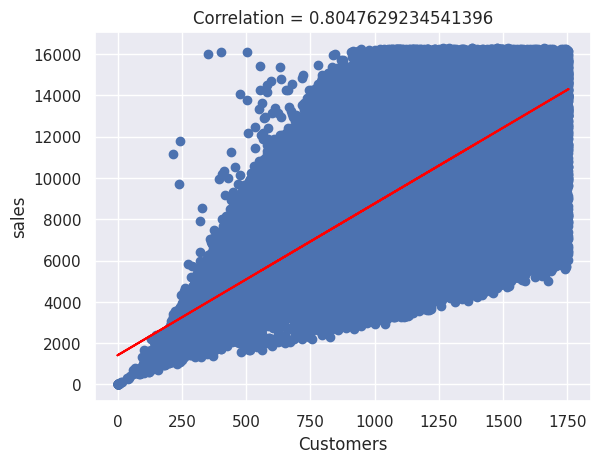

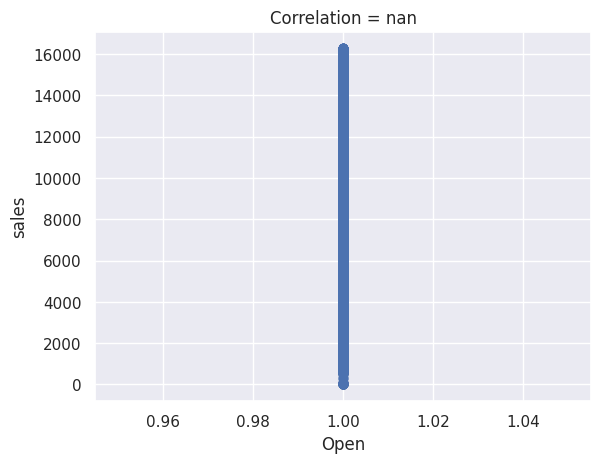

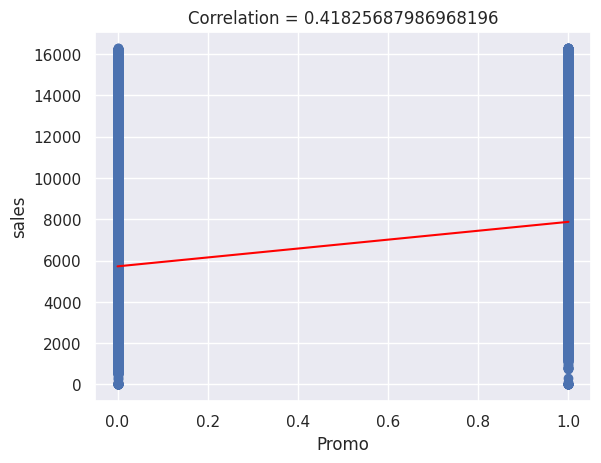

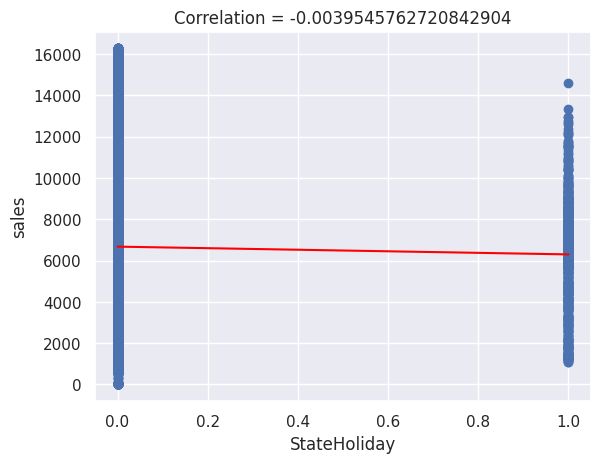

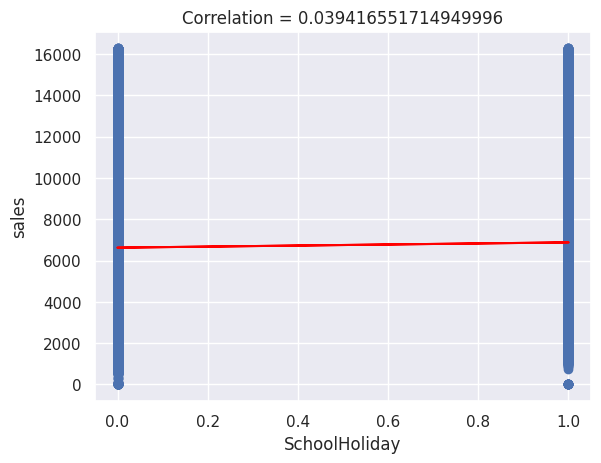

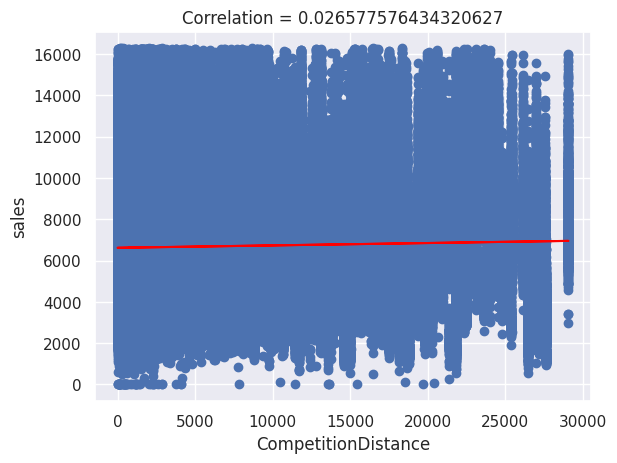

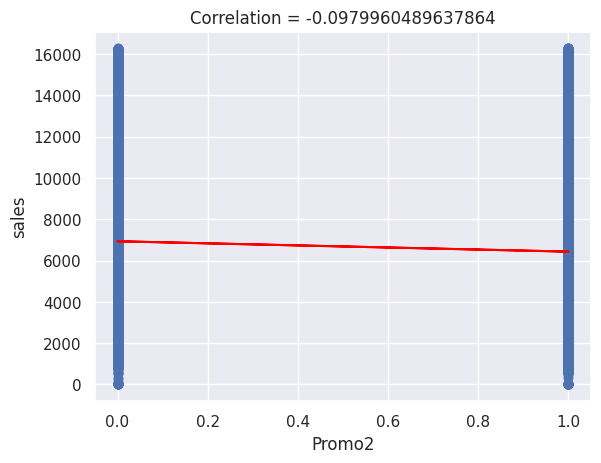

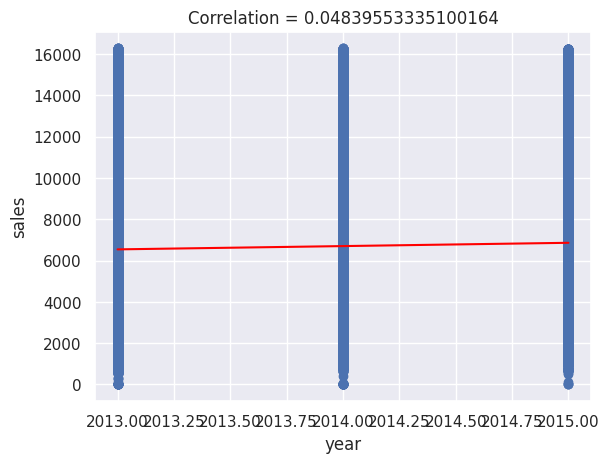

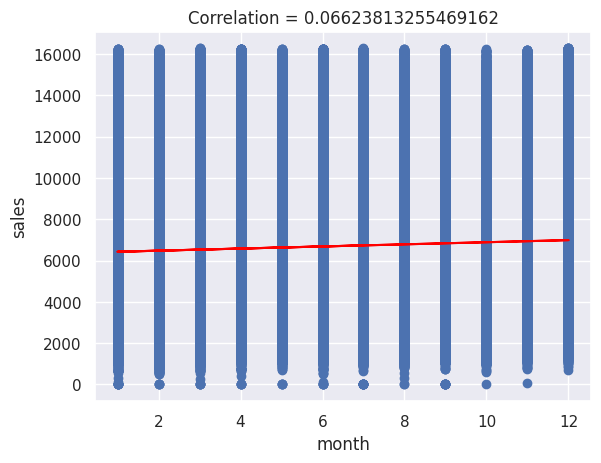

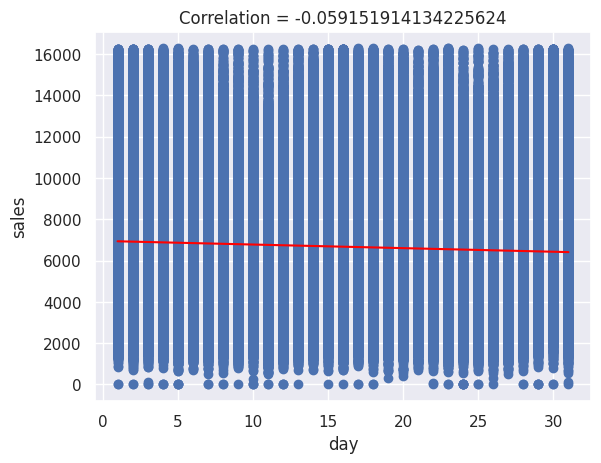

In [ ]:
# Chart - 6 visualization code
# bivariate analysis of continuous cols  .

for i in numerical_col:
    plt.scatter(new_df[i],new_df['Sales'])
    z = np.polyfit(new_df[i] , new_df['Sales'],1)
    yhat = np.poly1d(z)(new_df[i])
    plt.plot(new_df[i],yhat , color = 'red')
    plt.xlabel(i)
    plt.ylabel('sales')
    corr = new_df[i].corr(new_df['Sales'])
    plt.title(f'Correlation = {corr}')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Scatter plots give the relationship direction between dependent and independent variables . This gave the overview relation between continuous and dependent. variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1 - we see +ve linear relationship between customers and sales . which is very obvious

2 -- negative correlation for increasing day of week indicates that the sales is higher on the start of the week and then decreases with increasing day.least on sundays.

3 -- On giving promo , the sales tends to increase . 4 -- however on giving promo2 , not much increasing effect on sales is seen . 5 -- On holidays sales tends to decrease and same with closed stores which is obvious.

[ ]


#### Chart - 7

In [ ]:
# Chart - 7 visualization code
new_df[categorical_col].isnull().sum()

StoreType     0
Assortment    0
dtype: int64

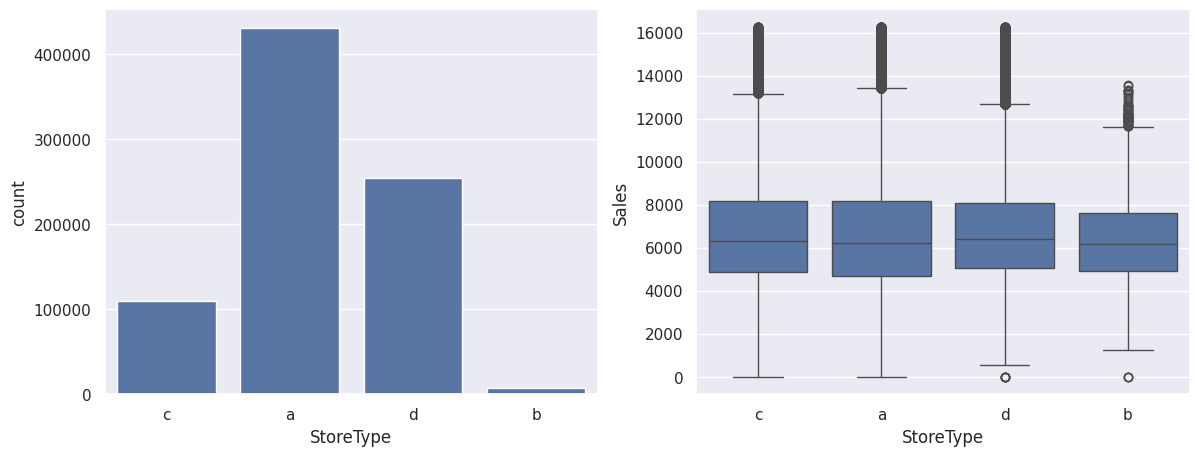

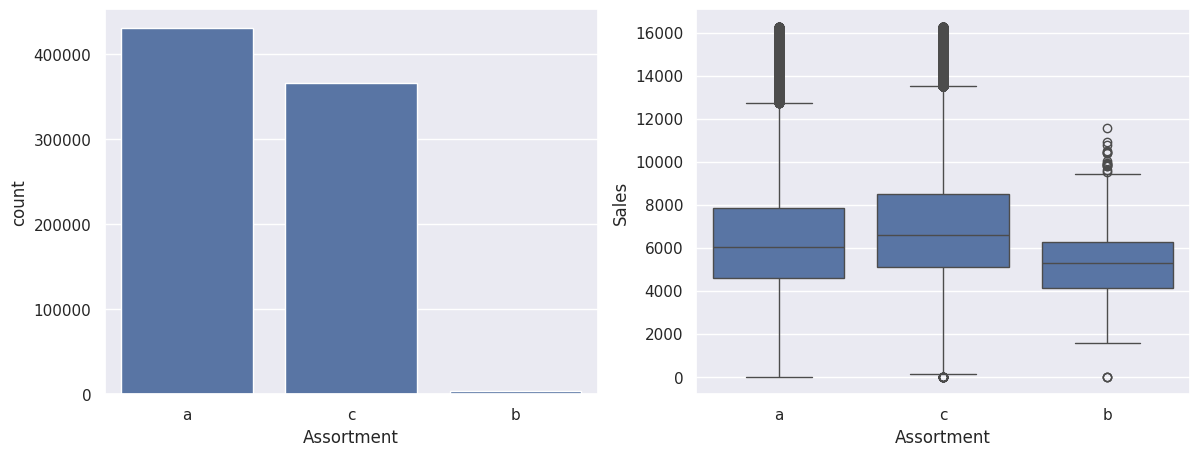

In [ ]:
# analysis of categorical columns

for i in categorical_col:
  plt.figure(figsize = (14,5))
  plt.subplot(1,2,1)
  sns.countplot(x = i , data = new_df)
  plt.subplot(1,2,2)
  sns.boxplot(x = i ,y = 'Sales' , data = new_df)
  plt.show()

#### Chart - 8

<Axes: xlabel='DayOfWeek', ylabel='count'>

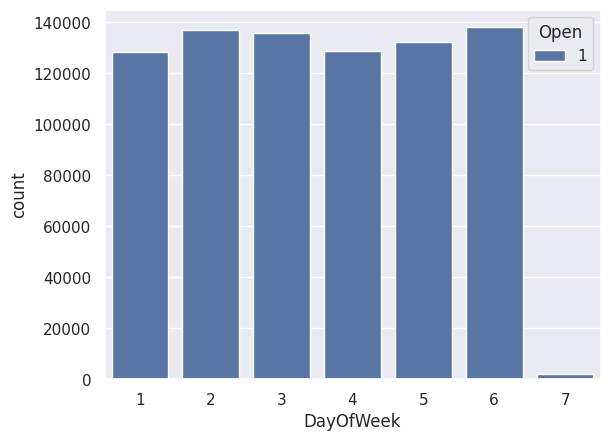

In [ ]:
# Chart - 8 visualization code
sns.countplot(x='DayOfWeek',hue='Open',data=new_df)
# As we can see that in the graph given below that Stores mainly closed on Sunday

##### 2. What is/are the insight(s) found from the chart?

Answer Here

THe store is mostly closed on sundays

#### Chart - 9

<Axes: xlabel='Promo', ylabel='Sales'>

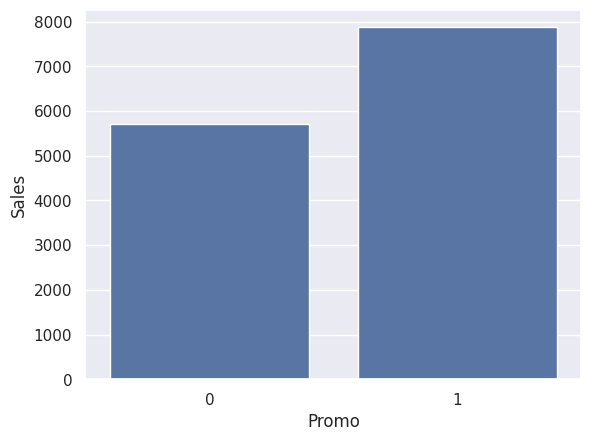

In [ ]:
# Chart - 9 visualization code
#Impact of promo on sales
Promo_sales = pd.DataFrame(new_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

# Sales Are nearly doubled High When Promo is Running

##### 2. What is/are the insight(s) found from the chart?

Answer Here

On giving promo , it is evident that sales is increased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

We can frequently give promo to increase the sales of any store.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
new_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,year,month,day
Store,1.000000,-0.000031,-0.000257,0.026756,NaN,-0.000135,0.003482,0.000627,-0.000345,0.003492,-0.000044,0.001700,-0.000021
DayOfWeek,-0.000031,1.000000,-0.195811,-0.134617,NaN,-0.283367,-0.000196,-0.137885,0.001218,-0.001389,0.001789,-0.018212,0.007931
Sales,-0.000257,-0.195811,1.000000,0.804763,NaN,0.418257,-0.003955,0.039417,0.026578,-0.097996,0.048396,0.066238,-0.059152
Customers,0.026756,-0.134617,0.804763,1.000000,NaN,0.238992,0.013538,0.030364,-0.156782,-0.203504,0.001818,0.052043,-0.044402
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.000135,-0.283367,0.418257,0.238992,NaN,1.000000,0.005667,0.028831,0.001546,0.000883,0.024452,-0.007632,-0.126503
StateHoliday,0.003482,-0.000196,-0.003955,0.013538,NaN,0.005667,1.000000,0.009591,0.006172,-0.004732,0.000803,0.000746,-0.004919
SchoolHoliday,0.000627,-0.137885,0.039417,0.030364,NaN,0.028831,0.009591,1.000000,-0.002899,-0.008983,-0.039363,0.120748,0.036433
CompetitionDistance,-0.000345,0.001218,0.026578,-0.156782,NaN,0.001546,0.006172,-0.002899,1.000000,-0.080900,-0.000151,0.001174,-0.000905
Promo2,0.003492,-0.001389,-0.097996,-0.203504,NaN,0.000883,-0.004732,-0.008983,-0.080900,1.000000,-0.005542,-0.024428,0.000156


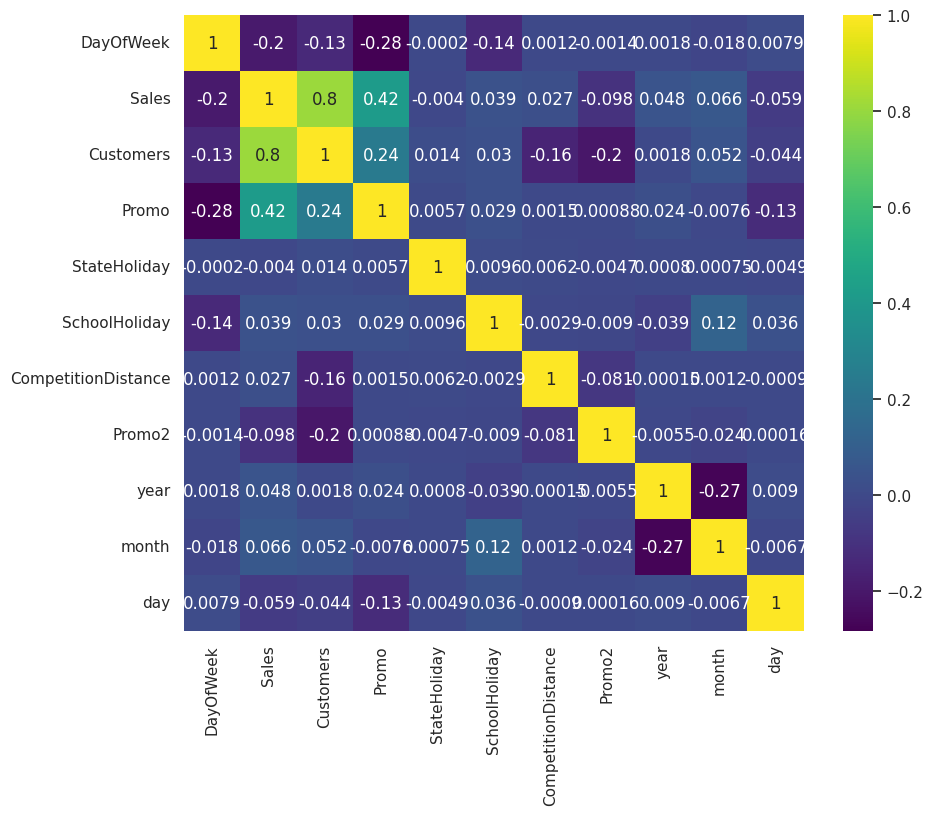

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (10,8))
sns.heatmap(new_df.drop(['Open','Store'], axis = 1).corr(),cmap = 'viridis' , annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Heatmap visualizes correlation of each feature with other features

##### 2. What is/are the insight(s) found from the chart?

Answer Here

High correlation of dependent variable Sales with Customers , Promo . Very low correlation with other features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

H0 : feature is normally distributed

H1 : features is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
for col in numerical_col :
  print('shapiro wilk test for ',col ,  '----' , shapiro(new_df[col]))

  # the columns having pvalue greater than 0.05 are normally distributed

shapiro wilk test for  Store ---- ShapiroResult(statistic=0.9533435702323914, pvalue=0.0)
shapiro wilk test for  DayOfWeek ---- ShapiroResult(statistic=0.9074282646179199, pvalue=0.0)
shapiro wilk test for  Sales ---- ShapiroResult(statistic=0.9658446311950684, pvalue=0.0)
shapiro wilk test for  Customers ---- ShapiroResult(statistic=0.9504779577255249, pvalue=0.0)
shapiro wilk test for  Open ---- ShapiroResult(statistic=1.0, pvalue=1.0)
shapiro wilk test for  Promo ---- ShapiroResult(statistic=0.6306610703468323, pvalue=0.0)
shapiro wilk test for  StateHoliday ---- ShapiroResult(statistic=0.008661627769470215, pvalue=0.0)
shapiro wilk test for  SchoolHoliday ---- ShapiroResult(statistic=0.4833366274833679, pvalue=0.0)
shapiro wilk test for  CompetitionDistance ---- ShapiroResult(statistic=0.7644267678260803, pvalue=0.0)
shapiro wilk test for  Promo2 ---- ShapiroResult(statistic=0.6345125436782837, pvalue=0.0)
shapiro wilk test for  year ---- ShapiroResult(statistic=0.7883762717247009,

##### Which statistical test have you done to obtain P-Value?

Answer Here.

We have conducted the shapiro wilk test to check for normality of each feature .

##### Why did you choose the specific statistical test?

Answer Here.

This test gives the pvalue less than significance level 0.05 if the normality assumption is false and pvalue greater than 0.05 if normality assumption is True.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

H0 : feature follow homoscedasticity or equal variance

H1 : Feature does not follow homoscedasticity

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import levene
for col in numerical_col:
  print(levene(new_df[col],new_df['Sales']))

# if pval is greater than 0.05 it has equal variance with sales column else no homoscedasticity

LeveneResult(statistic=859774.3147904, pvalue=0.0)
LeveneResult(statistic=1173620.15420146, pvalue=0.0)
LeveneResult(statistic=0.0, pvalue=1.0)
LeveneResult(statistic=923726.1765888595, pvalue=0.0)
LeveneResult(statistic=1175394.1573546408, pvalue=0.0)
LeveneResult(statistic=1174872.7713421874, pvalue=0.0)
LeveneResult(statistic=1175393.303772515, pvalue=0.0)
LeveneResult(statistic=1175166.545387285, pvalue=0.0)
LeveneResult(statistic=105196.23812643044, pvalue=0.0)
LeveneResult(statistic=1174826.746786335, pvalue=0.0)
LeveneResult(statistic=1174648.5927298653, pvalue=0.0)
LeveneResult(statistic=1172084.2836360782, pvalue=0.0)
LeveneResult(statistic=1166586.4506767432, pvalue=0.0)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

We have used the levene test to check the homoscedasticity of each independent variable with dependent variable.

##### Why did you choose the specific statistical test?

Answer Here.

This test provides the pval less than 0.05 ie the significance level when the assumption of homoscedasticity is not met.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


new_df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
month                  0
day                    0
dtype: int64

In [ ]:
new_df.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31
5,6,5,5651,589,1,1,0,1,a,a,310.0,0,2015,7,31


 one hot encoding on storetype and assortment

 scaling

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
for i in categorical_col:
  print(new_df[i].value_counts())

a    431073
d    254064
c    109325
b      7194
Name: StoreType, dtype: int64
a    431378
c    366676
b      3602
Name: Assortment, dtype: int64


In [ ]:
dummy_df = pd.get_dummies(new_df[categorical_col],drop_first = True)

# Taking care of dummy variable trap .

In [ ]:
dummy_df

,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,0,1,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,0,1
5,0,0,0,0,0
...,...,...,...,...,...
1016770,1,0,0,1,0
1016776,1,0,0,0,0
1016863,1,0,0,1,0
1017042,1,0,0,1,0


In [ ]:
new_df.drop(categorical_col , axis = 1 , inplace = True)

In [ ]:
new_df = pd.concat([new_df , dummy_df],axis = 1)

In [ ]:
new_df.shape

(801656, 18)

In [ ]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,year,month,day,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,0,1,1270.0,0,2015,7,31,0,1,0,0,0
1,2,5,6064,625,1,1,0,1,570.0,1,2015,7,31,0,0,0,0,0
2,3,5,8314,821,1,1,0,1,14130.0,1,2015,7,31,0,0,0,0,0
3,4,5,13995,1498,1,1,0,1,620.0,0,2015,7,31,0,1,0,0,1
5,6,5,5651,589,1,1,0,1,310.0,0,2015,7,31,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

We did one hot encoding on the categorical columns using the pd.get_dummies function . This is needed because the values present in these columns were of cardinal nature which do not holding any ranking order with one another . Hence ordinal encoding was not a viable option to implement. Further to make some reduction in dimensionality and reduce multicollinearity , we also took care dummy_variable trap by using drop_first = True.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes some numerical columns needs to transformed because they show deviations from normal distribution . Transformation helps make feature more alike normal distribution which cause the regression algorithms to give better performance.

In [ ]:
# Transform Your data


In [ ]:
copy_df = new_df.copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_pow = pt.fit_transform(copy_df[['Customers'  , 'CompetitionDistance']])

In [ ]:
copy_df[['Customers'  , 'CompetitionDistance']] = df_pow

In [ ]:
pt = PowerTransformer()
transformed_sales = pt.fit_transform(copy_df[['Sales']])
copy_df[['Sales']] = transformed_sales

In [ ]:
copy_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,year,month,day,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,-0.468452,-0.491826,1,1,0,1,-0.415333,0,2015,7,31,0,1,0,0,0
1,2,5,-0.117989,-0.195945,1,1,0,1,-0.883894,1,2015,7,31,0,0,0,0,0
2,3,5,0.724396,0.512257,1,1,0,1,1.403391,1,2015,7,31,0,0,0,0,0
3,4,5,2.322259,2.225161,1,1,0,1,-0.837427,0,2015,7,31,0,1,0,0,1
5,6,5,-0.294541,-0.344648,1,1,0,1,-1.202768,0,2015,7,31,0,0,0,0,0


In [ ]:
X = copy_df.drop('Sales',axis = 1)
y = copy_df['Sales']

### 6. Data Scaling

##### Which method have you used to scale you data and why?

Data scaling is not needed after powerTransformation as it automatically processes  the scaling of the transformed columns.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X , y ,test_size = 0.2,random_state = 10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(641324, 17)
(160332, 17)
(641324,)
(160332,)


##### What data splitting ratio have you used and why?

Answer Here.

We have used the 80-20 ratio for train - test split because it is standard practice plus we have a suffienctly large data as well.

### 9. Handling Imbalanced Dataset

We are doing the regression problem so it is not a issue here .

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation -- Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the Algorithm
lr.fit(xtrain , ytrain)
# Predict on the model
ypred = lr.predict(xtest)

In [ ]:
print(lr.score(xtrain , ytrain))
print(lr.score(xtest , ytest))

0.8449626185200948
0.8455646109942176


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ytest_transformed = pt.inverse_transform(ytest.values.reshape(-1,1))
ypred_transformed = pt.inverse_transform(ypred.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
mse = mean_squared_error(ytest_transformed , ypred_transformed )
mae = mean_absolute_error(ytest_transformed , ypred_transformed)
r2 = r2_score(ytest_transformed , ypred_transformed)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
print('mse = ' , mse)
print('mae = ' , mae)
print('r2 = ' , r2)
print('adjusted r2 =' , adjusted_r2)

mse =  1131348.4722654638
mae =  801.3168520476785
r2 =  0.8286288011282722
adjusted r2 = 0.828610628601975


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

# Fit the Algorithm
scorescv = cross_val_score(lr , X , y , cv = 5 , scoring = 'r2')

print(scorescv)
print(scorescv.mean())

[0.83436122 0.84663513 0.84635213 0.84199021 0.84452643]
0.8427730212912117


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

We have only used cross validation because there are no hyperparameter to optimize for normal linear regression.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# implementation of lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
ridge = Ridge()
params = {'alpha' : [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(lasso,param_grid = params , scoring = 'r2' , cv = 5)
grid1 = GridSearchCV(ridge,param_grid = params , scoring = 'r2' , cv = 5)
grid.fit(X,y)
grid1.fit(X,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [ ]:
best_lasso_model = grid.best_estimator_
best_lasso_alpha = grid.best_params_['alpha']
best_ridge_model = grid1.best_estimator_
best_ridge_alpha = grid1.best_params_['alpha']

In [ ]:
print(best_lasso_model)
print(best_lasso_alpha)
print(best_ridge_model)
print(best_ridge_alpha)

Lasso(alpha=0.001)
0.001
Ridge(alpha=10)
10


In [ ]:
# metrics for best lasso model
best_lasso_model.fit(xtrain,ytrain)
ypred = best_lasso_model.predict(xtest)
ypred_transformed = pt.inverse_transform(ypred.reshape(-1,1))
mse = mean_squared_error(ytest_transformed , ypred_transformed )
mae = mean_absolute_error(ytest_transformed , ypred_transformed)
r2 = r2_score(ytest_transformed , ypred_transformed)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(mse)
print(mae)
print(r2)
print(adjusted_r2)

1134661.8400714574
802.2300316924167
0.8281269081862337
0.8281086824382589


In [ ]:
# metrics for best ridge model
best_ridge_model.fit(xtrain,ytrain)
ypred = best_ridge_model.predict(xtest)
ypred_transformed = pt.inverse_transform(ypred.reshape(-1,1))
mse = mean_squared_error(ytest_transformed , ypred_transformed )
mae = mean_absolute_error(ytest_transformed , ypred_transformed)
r2 = r2_score(ytest_transformed , ypred_transformed)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(mse)
print(mae)
print(r2)
print(adjusted_r2)

1131364.6105755712
801.3286324863619
0.8286263565750521
0.8286081837895298


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation--DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Fit the Algorithm
dtr.fit(xtrain , ytrain)
# Predict on the model
ypred = dtr.predict(xtest)

In [ ]:
dtr.get_depth()

45

In [ ]:
dtr.score(xtest,ytest)

0.946506205933315

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ypred_transformed = pt.inverse_transform(ypred.reshape(-1,1))
mse = mean_squared_error(ytest_transformed , ypred_transformed)
mae = mean_absolute_error(ytest_transformed , ypred_transformed)
r2 = r2_score(ytest_transformed , ypred_transformed)
n = xtest.shape[0]
p = xtest.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('mse = ' , mse)
print('mae = ' , mae)
print('r2 = ' , r2)
print('adjusted r2 = ' , adj_r2)

mse =  406640.7298106426
mae =  439.7873038445225
r2 =  0.9384040275069442
adjusted r2 =  0.9383974957534331


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'max_depth' : [6,8] , 'min_samples_leaf': [50 , 100] , 'min_samples_split' : [100 , 200] }
dtr1 = DecisionTreeRegressor()
grid = GridSearchCV(dtr1,params, scoring = 'r2' , cv = 5)
# Fit the Algorithm
grid.fit(X,y)
# Predict on the model
ypred = grid.predict(xtest)
ypred_transformed = pt.inverse_transform(ypred.reshape(-1,1))
print('r2 score = ',r2_score(ytest_transformed , ypred_transformed))
print('mse = ' , mean_squared_error(ytest_transformed , ypred_transformed))
print('mae = ' , mean_absolute_error(ytest_transformed , ypred_transformed))

r2 score =  0.8245121921662844
mse =  1158525.2632940728
mae =  804.6958985505272


In [ ]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=50, min_samples_split=100)

In [ ]:
dtr1 = grid.best_estimator_

dtr1.feature_importances_

array([7.26185639e-04, 4.87729232e-03, 8.24388534e-01, 0.00000000e+00,
       4.90453283e-02, 0.00000000e+00, 0.00000000e+00, 2.93899000e-02,
       5.10945478e-03, 1.49117167e-05, 3.68926423e-04, 0.00000000e+00,
       2.85613570e-04, 0.00000000e+00, 7.02310910e-02, 1.55384240e-02,
       2.43378924e-05])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

we have used grid-search which allows cross validation along with best hyperparameters search algorithm.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

We have used the r2 score which tells how better the model is compared to mean based model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

We see that decision tree with full grown tree are giving the best results among linear regression , lasso and ridge .But we wont choose that model as it is too complex . it has the max_depth of 45 .

The other three models simple LR , lasso , Ridge , and regularized Decision tree are comparable with there MAE . All of them lie in the range of 800 MAE . We can go with the best performer among them ie the Ridge model.Further unlike DT model,Ridge model can be used for interpolation of sales value for a new test datapoint.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
best_ridge_model.coef_

array([-3.46070123e-05, -2.74877044e-03,  9.05396590e-01,  0.00000000e+00,
        3.71288817e-01, -1.24332397e-01,  1.02839819e-02,  1.51386074e-01,
        1.76062892e-01,  6.40168716e-02,  1.01017455e-02,  4.58496936e-04,
       -5.01755893e-01, -7.80310480e-02,  4.31639716e-01, -1.35393286e+00,
        8.76342456e-02])

In [ ]:
[format(c, '.4f') for c in best_ridge_model.coef_]

['-0.0000',
 '-0.0027',
 '0.9054',
 '0.0000',
 '0.3713',
 '-0.1243',
 '0.0103',
 '0.1514',
 '0.1761',
 '0.0640',
 '0.0101',
 '0.0005',
 '-0.5018',
 '-0.0780',
 '0.4316',
 '-1.3539',
 '0.0876']

In [ ]:
X.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'month',
       'day', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
# High positive correlation with Customers  , Promo , StoreType_d
# High negative correlation with  StoreType_b ,Assortment_b

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:

# Save the File
import joblib
joblib.dump(best_ridge_model ,'best_model.joblib')

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

best_model = joblib.load('best_model.joblib')

ypred = best_model.predict(xtest)
r2_score(ytest,ypred)

0.8455640868442877

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

In conclusion, this machine learning project aimed to predict sales based on various features, employing a combination of exploratory data analysis and regression modeling. The key findings and takeaways from this project are summarized below:

Model Performance:

Our regression models, including the Linear Regression,the Lasso Regression ,the Ridge regression and Decision Tree Regressor, demonstrated promising performance. The Ridge model, with its regularization capabilities, exhibited robust generalization to unseen data, achieving a mean absolute error of 801 on the test set.

Feature Importance:

Feature importance analysis revealed that the Cutomers , Promo , StoreType_d significantly positively influenced Sales value and StoreType_b , Assortment_b significantly negatively influenced the Sales value. The Ridge model, with its regularization penalty, effectively identified and assigned appropriate weights to these crucial features.

Challenges and Limitations:

Challenges in the project included dealing with missing data in certain features and the need for careful feature engineering. Despite these challenges, the models provided valuable insights into the factors influencing sales value.

In summary, this project successfully addressed the task of sales prediction, providing actionable insights and a reliable model for estimating sales value. The lessons learned and methodologies applied pave the way for future endeavors in predictive modeling within the Sales prediction domain.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***